In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv("covid_with_dummies.csv")

In [3]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [4]:
df.death.value_counts()

0    947320
1     74657
Name: death, dtype: int64

In [5]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score

In [6]:
def scores(y_train,y_val,x_train,x_val,model):
    predicted_train = model.predict(x_train)
    predicted_val = model.predict(x_val)
    precision = [round(precision_score(y_train,predicted_train)*100,2),round(precision_score(y_val,predicted_val)*100,2)]
    recall = [round(recall_score(y_train,predicted_train)*100,2),round(recall_score(y_val,predicted_val)*100,2)]
    f1 = [round(f1_score(y_train,predicted_train)*100,2),round(f1_score(y_val,predicted_val)*100,2)]
    return pd.DataFrame({"Dataset":["Train","Validation"],
                        "Precision": precision,
                        "Recall":recall,
                        "F1 Score":f1,
                        "Accuracy":[round(model.score(x_train, y_train) * 100, 2),round(model.score(x_val, y_val) * 100, 2)]})

In [7]:
def print_confusion_matrix(confusion_matrix, figsize = [12,8], fontsize=12):
    
    df_cm = pd.DataFrame(confusion_matrix, index=["Alive",'Dead'], columns=["Alive",'Dead'])
    fig = plt.figure(figsize=figsize)
    
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap=plt.cm.Blues)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    return fig

In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
from imblearn.under_sampling import RandomUnderSampler
X_under, y_under = RandomUnderSampler().fit_resample(X,y)

In [10]:
Counter(y_under)

Counter({0: 74657, 1: 74657})

In [11]:
X_train, x_test, Y_train, y_test = train_test_split(X_under, y_under,
                                                    test_size = 0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logreg = LogisticRegression(solver='liblinear').fit(x_train, y_train)
under_logreg = scores(y_train,y_val,x_train,x_val,logreg)
under_logreg

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,88.83,91.95,90.36,90.19
1,Validation,89.02,92.14,90.55,90.43


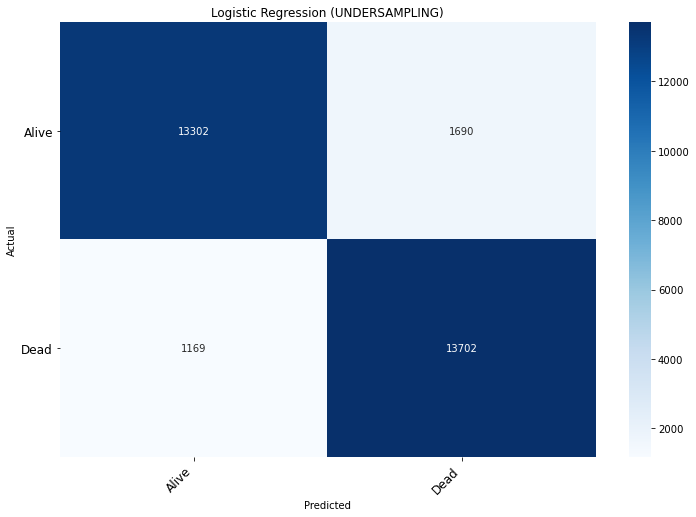

In [14]:
cm = print_confusion_matrix(confusion_matrix(y_val, logreg.predict(x_val)))
plt.title("Logistic Regression (UNDERSAMPLING)");

In [15]:
# Support Vector classifier
svc = LinearSVC(dual=False).fit(x_train, y_train)
under_svc = scores(y_train,y_val,x_train,x_val,svc)
under_svc

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,88.33,91.41,89.84,89.66
1,Validation,88.55,91.76,90.12,89.98


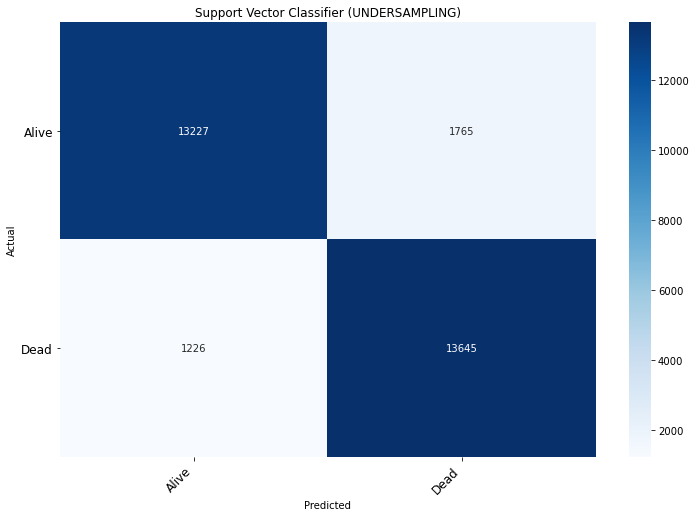

In [16]:
cm = print_confusion_matrix(confusion_matrix(y_val, svc.predict(x_val)))
plt.title("Support Vector Classifier (UNDERSAMPLING)");

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Random forest classifier
random_forest = RandomForestClassifier().fit(x_train, y_train)
under_rf = scores(y_train,y_val,x_train,x_val,random_forest)
under_rf

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,89.19,94.89,91.95,91.69
1,Validation,88.19,94.17,91.08,90.81


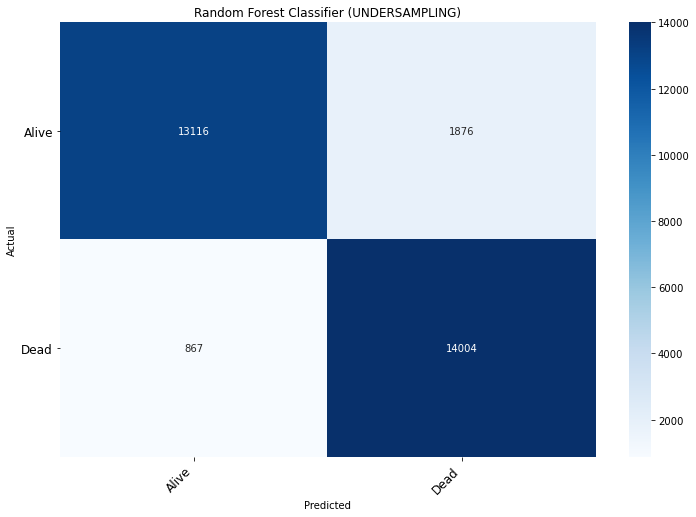

In [19]:
cm = print_confusion_matrix(confusion_matrix(y_val, random_forest.predict(x_val)))
plt.title("Random Forest Classifier (UNDERSAMPLING)");

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# Gaussian Naive Bayes
gaussian = GaussianNB().fit(x_train, y_train)  
under_gaussian = scores(y_train,y_val,x_train,x_val,gaussian)
under_gaussian

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,86.28,86.62,86.45,86.42
1,Validation,86.57,86.40,86.48,86.55


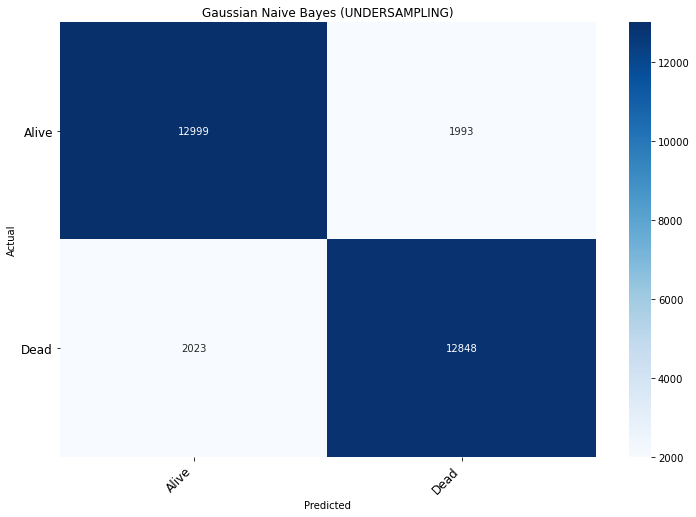

In [22]:
cm = print_confusion_matrix(confusion_matrix(y_val, gaussian.predict(x_val)))
plt.title("Gaussian Naive Bayes (UNDERSAMPLING)");

In [23]:
from sklearn.linear_model import Perceptron

In [24]:
# Perceptron
perceptron = Perceptron().fit(x_train, y_train)
under_perceptron = scores(y_train,y_val,x_train,x_val,perceptron)
under_perceptron

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,88.76,92.65,90.67,90.46
1,Validation,88.90,92.56,90.69,90.54


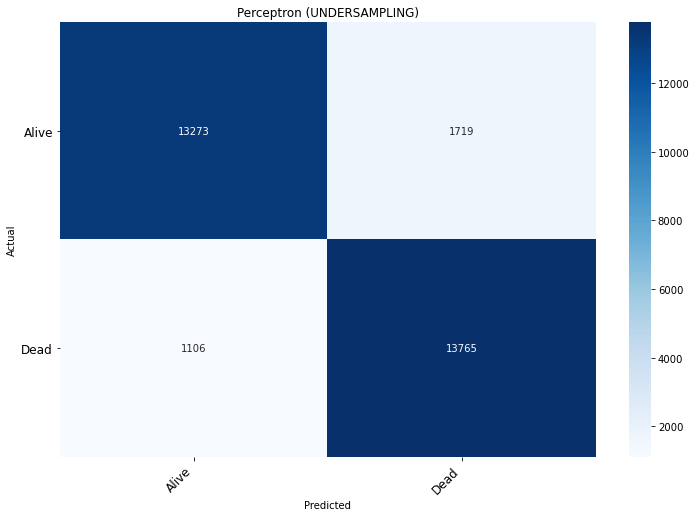

In [25]:
cm = print_confusion_matrix(confusion_matrix(y_val, perceptron.predict(x_val)))
plt.title("Perceptron (UNDERSAMPLING)");

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# Decision Tree
decision_tree = DecisionTreeClassifier().fit(x_train, y_train)
under_decision_tree = scores(y_train,y_val,x_train,x_val,decision_tree)
under_decision_tree

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,89.52,94.45,91.92,91.69
1,Validation,88.30,93.20,90.69,90.47


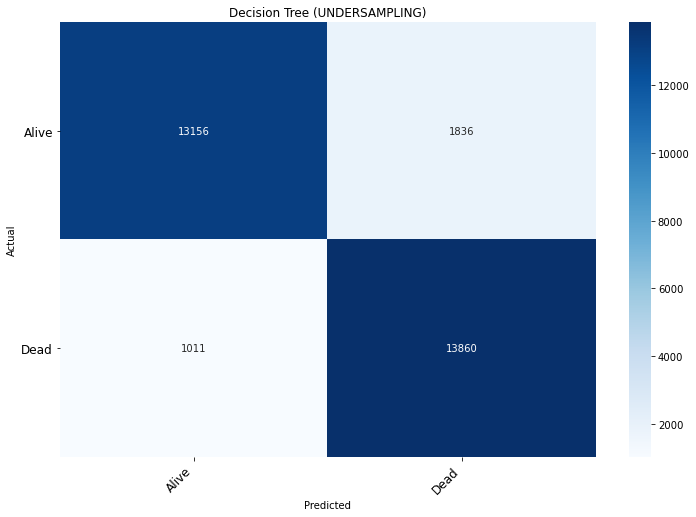

In [28]:
cm = print_confusion_matrix(confusion_matrix(y_val, decision_tree.predict(x_val)))
plt.title("Decision Tree (UNDERSAMPLING)");

In [29]:
# XGBoost
xgb = XGBClassifier().fit(x_train, y_train)
under_xgb = scores(y_train,y_val,x_train,x_val,xgb)
under_xgb

,Dataset,Precision,Recall,F1 Score,Accuracy
0,Train,88.61,94.67,91.54,91.25
1,Validation,88.40,94.39,91.30,91.04


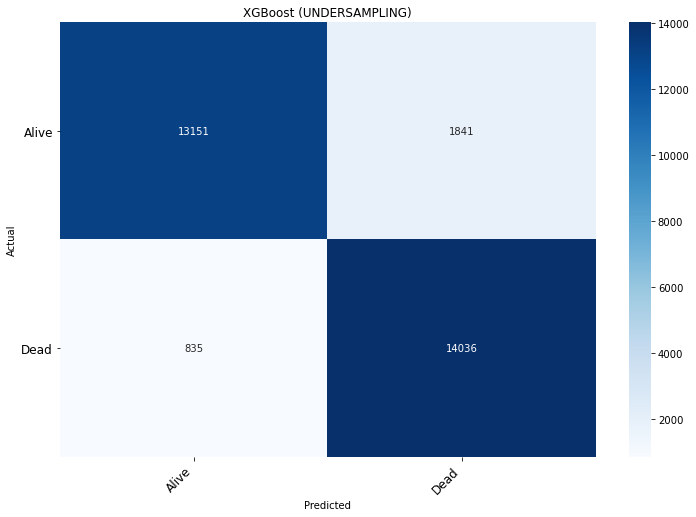

In [44]:
cm = print_confusion_matrix(confusion_matrix(y_val, xgb.predict(x_val)))
plt.title("XGBoost (UNDERSAMPLING)");

In [31]:
dataframes = [under_logreg,under_svc,under_rf,under_gaussian,under_perceptron,under_decision_tree,under_xgb]
model = ["Logistic Regression","SVC","Random Forest","GaussianNB","Perceptron","Decision Tree","XGBoost"]
precisions = []
recalls = []
f1_scores= []
accuracies = []
for dataframe in dataframes:
    precisions.append(dataframe.iloc[1,1])
    recalls.append(dataframe.iloc[1,2])
    f1_scores.append(dataframe.iloc[1,3])
    accuracies.append(dataframe.iloc[1,4])
models_with_SMOTE = pd.DataFrame({"Model":model, "Precision":precisions,"Recall":recalls,"F1 Score":f1_scores,"Accuracy":accuracies})
models_with_SMOTE.set_index("Model").sort_values(by="F1 Score",ascending=False)

,Precision,Recall,F1 Score,Accuracy
Model,,,,
XGBoost,88.40,94.39,91.30,91.04
Random Forest,88.19,94.17,91.08,90.81
Perceptron,88.90,92.56,90.69,90.54
Decision Tree,88.30,93.20,90.69,90.47
Logistic Regression,89.02,92.14,90.55,90.43
SVC,88.55,91.76,90.12,89.98
GaussianNB,86.57,86.40,86.48,86.55


### <font color="blue"> En iyi model: XGBoost

<font color="blue"> Veri setimizin %80'i ile modelimizi tekrar eğitiyoruz.

In [32]:
xgb_last = XGBClassifier().fit(X_train, Y_train)

In [33]:
from sklearn.model_selection import cross_val_score

scores_accuracy = cross_val_score(xgb_last, X_train, Y_train, cv=5, scoring = "accuracy")

print("Scores:", scores_accuracy)
print("Mean:", scores_accuracy.mean())
print("Standard Deviation:", scores_accuracy.std())

Scores: [0.90766397 0.91125994 0.91046463 0.90920887 0.90740896]
Mean: 0.9092012753120645
Standard Deviation: 0.0015106240934737868


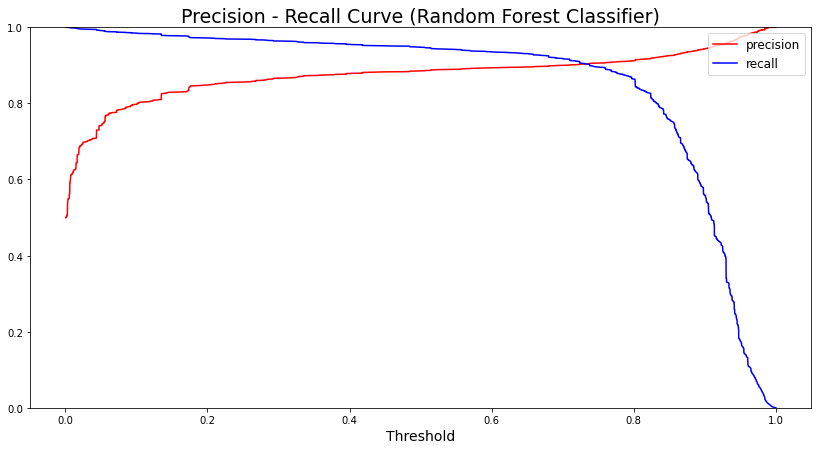

In [34]:
from sklearn.metrics import precision_recall_curve

y_scores = xgb_last.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision")
    plt.plot(threshold, recall[:-1], "b", label="recall")
    plt.title("Precision - Recall Curve (Random Forest Classifier)",fontsize=19)
    plt.xlabel("Threshold", fontsize=14)
    plt.legend(loc="upper right", fontsize=12)
    plt.ylim([0, 1])

plt.figure(figsize=[14,7])
plot_precision_and_recall(precision, recall, threshold)

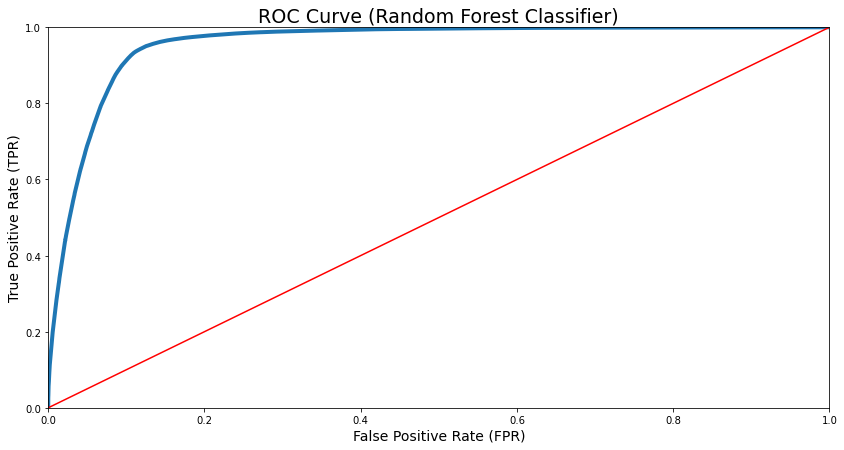

In [35]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=4, label=label)
    plt.plot([0, 1], [0, 1], 'r')
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve (Random Forest Classifier)",fontsize=19)
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)

plt.figure(figsize=[14,7])
plot_roc_curve(false_positive_rate, true_positive_rate)

In [36]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC Score:", r_a_score)

ROC-AUC Score: 0.9557384133359488


In [37]:
test_pred_l = xgb_last.predict(x_test.values)

In [38]:
print("Precision:", round(precision_score(y_test,test_pred_l)*100,2))
print("Recall:", round(recall_score(y_test,test_pred_l)*100,2))
print("F1 Score:", round(f1_score(y_test,test_pred_l)*100,2))
print("Accuracy:", round(xgb_last.score(x_test, y_test) * 100, 2))

Precision: 88.17
Recall: 94.16
F1 Score: 91.07
Accuracy: 90.74


In [39]:
from sklearn.metrics import log_loss

print("Log-Loss: {:2.3f}".format(log_loss(y_test, xgb_last.predict_proba(x_test))))

Log-Loss: 0.263


In [40]:
from joblib import dump, load

In [41]:
dump(xgb_last,"xgb_undersampling.pkl")

['xgb_undersampling.pkl']